[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/3/W3ALE2.ipynb)


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import numpy as np
import scipy.stats
from scipy import stats

# Use acceptance and rejection method to draw sample from $\chi$  with pdf given by $f_\chi(x) = \frac{1}{\pi} x\sin{x}$ for $x$  in $[0, \pi]$.



1. Find a random variable Y with density g satisfying $f (t)/g(t) ≤ c$, for
all t such that $f (t) > 0$. Provide a method to generate random Y.
2. For each random variate required:

(a) Generate a random $y$ from the distribution with density $g$.

(b) Generate a random $u$ from the $Uniform(0, 1)$ distribution.

(c) If $u < f (y)/(cg(y))$, accept $y$ and deliver $x = y$; otherwise reject $y$
and repeat from Step 2a.
# In this example you will implement two functions
# 1) return_single_sample
# 2) return_sample

In [50]:
## Here is your f, do not adjust it!!!
f = lambda x: x*np.sin(x)/np.pi

In [51]:
### cheap way to sample from U(0,1) is np.random.rand()
### the following function should return a sample of size 1, from f.
### remember a number it should spit out!!!
def return_single_sample()->float:
  ## Your code here!!!
  ## you should have a while loop here!!!
  ## your code of acceptance and rejection should be included in the while loop.
  ## For g you should come up with an appropriate choice!!!

    c=2
    g=lambda x:4/np.pi


    while True:
      Y = np.random.uniform(0,np.pi)
      U = np.random.rand()

      if U<=f(Y)/(c*g(Y)):
          return Y


    return None

In [52]:
## Let's give a try, the
return_single_sample()
## You got a real number right???

1.4082061614749237

In [53]:
### Run your unit test to jump to another step!!!
assert isinstance(return_single_sample(), float), "Things went bad!!! watcha the details, A numpy array!!! :..("
assert 0<return_single_sample()<np.pi, "Oh gosh!!!!"
print("Arright frendo, things look good!!!")

Arright frendo, things look good!!!


In [54]:
def return_sample(size: int) -> np.ndarray:

    g=lambda x:4/np.pi
    c = 2  # Choose an appropriate value of c

    samples=[]
    while len(samples)<size:
        Y=np.random.uniform(0,np.pi)
        U = np.random.rand()


        if U <= f(Y) / (c * g(Y)):
            samples.append(Y)

    return np.array(samples)

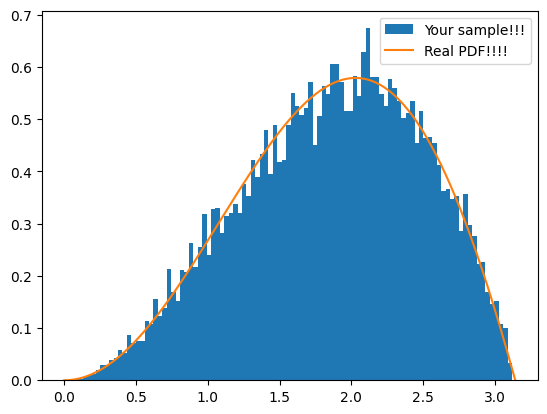

In [55]:
## Let's sketch some histograms to see how ya doin', if the graph and the samples do not match
## then the next unit test will not work!!!
X = np.arange(0,np.pi, 0.001)
plt.hist(return_sample(10000), density = True, label = "Your sample!!!", bins = 100)
plt.plot(X, list(map(lambda x: x*np.sin(x)/np.pi, X)), label = "Real PDF!!!!")
plt.legend()
plt.show()

In [56]:
### Some unit tests... to see if you are doing good!!!
class distribution(stats.rv_continuous):
    def __init__(self, a = 0,b = np.pi):
        super().__init__(a = a, b = b)
    def _pdf(self, x):
        return x*np.sin(x)/np.pi
assert isinstance(return_sample(100), np.ndarray), "A numpy array you should return!!!"
assert scipy.stats.kstest(return_sample(1000), distribution().rvs(size = 1000)).pvalue, "Check your implementatiom MATEEEE!!!"
print("Yaa doin' good buddy!!! Go get some rest, you have come a long way!!!")

Yaa doin' good buddy!!! Go get some rest, you have come a long way!!!
